<a href="https://www.kaggle.com/code/shreyasdomde/flower-classification?scriptVersionId=162286206" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pickle 
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from tensorflow.keras.utils import normalize
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers.experimental import preprocessing 
from sklearn.model_selection import train_test_split

In [2]:
datadir = r'/kaggle/input/flowers/flowers'

In [3]:
Categories = []
for cat in os.listdir(datadir):
    Categories.append(cat)

# Reading Image

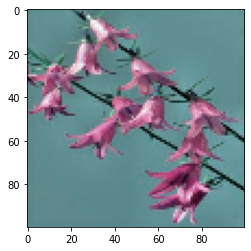

In [4]:
img_size=(100, 100)
for cat in Categories:
    img_path = os.path.join(datadir, '/kaggle/input/flowers/flowers/bellflower')
    for img_dir in os.listdir(img_path):
        img = cv2.imread(os.path.join(img_path, img_dir), cv2.COLOR_BGR2RGB)
        img_array = cv2.resize(img, img_size)
        img_resized = cv2.resize(img_array, img_size)
        plt.imshow(img_resized)
        plt.show()
        break
    break

# Creating Dataset

In [5]:
flower_data = []
img_size = (100, 100)
for cat in Categories:
    path = os.path.join(datadir, cat)
    class_num = Categories.index(cat)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.COLOR_BGR2RGB)
        img_array = cv2.resize(img_array, img_size)
        flower_data.append([img_array, class_num])

In [6]:
random.shuffle(flower_data)

In [7]:
X = []
y = []
for img, label in flower_data:
    X.append(img)
    y.append(label)

In [8]:
def make_rgb(img):
    if len(img.shape) == 3:
        return img
    img3 = np.empty(img.shape + (3,))
    img3[:, :, :] = img[:, :, np.newaxis]
    return img3

X = [make_rgb(im) for im in X]

# Standardizing X and y

In [9]:
X = np.array(X).reshape(-1, 100, 100, 3)
y = np.array(y)

In [10]:
X = keras.utils.normalize(
    X, axis=1, order=2
)

In [11]:
y = to_categorical(y)

# Splitting Training and Test data

In [12]:
X_train, X_tvalid, y_train, y_tvalid = train_test_split(X, y)

In [13]:
X_valid, X_test, y_valid, y_test = train_test_split(X_tvalid, y_tvalid)

# Devloping Model

In [14]:
early_stopping = callbacks.EarlyStopping(
    patience = 15,
    restore_best_weights = True,
    verbose = 1,
    min_delta = 0.001,
)

In [15]:
model = keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(factor=0.10),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3), padding='Same'),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='Same'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='Same'),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='Same'),
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='Same'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='Same'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    
    layers.Dense(units=512, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    
    layers.Dense(units=524, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    
    layers.Dense(units=524, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    
    layers.Dense(units=524, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    
    layers.Dense(units=16, activation='softmax'),
])

In [16]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [17]:
history = model.fit(
    X_train, y_train,
    validation_data = (X_valid, y_valid),
    epochs = 100,
    batch_size = 64, 
    callbacks = [early_stopping]
)

Epoch 1/100
185/185 [==============================] - 41s 140ms/step - loss: 3.2574 - accuracy: 0.0951 - val_loss: 4.0418 - val_accuracy: 0.0559
Epoch 2/100
185/185 [==============================] - 24s 128ms/step - loss: 2.2476 - accuracy: 0.2622 - val_loss: 4.9924 - val_accuracy: 0.0613
Epoch 3/100
185/185 [==============================] - 24s 130ms/step - loss: 1.8936 - accuracy: 0.3585 - val_loss: 2.8605 - val_accuracy: 0.1972
Epoch 4/100
185/185 [==============================] - 25s 133ms/step - loss: 1.7344 - accuracy: 0.4200 - val_loss: 1.6360 - val_accuracy: 0.4754
Epoch 5/100
185/185 [==============================] - 25s 137ms/step - loss: 1.6137 - accuracy: 0.4666 - val_loss: 1.9282 - val_accuracy: 0.3985
Epoch 6/100
185/185 [==============================] - 25s 137ms/step - loss: 1.4922 - accuracy: 0.5095 - val_loss: 2.1217 - val_accuracy: 0.3853
Epoch 7/100
185/185 [==============================] - 25s 135ms/step - loss: 1.4005 - accuracy: 0.5393 - val_loss: 1.5660 -

In [18]:
history_df = pd.DataFrame(history.history)

# Plotting the results

<AxesSubplot:>

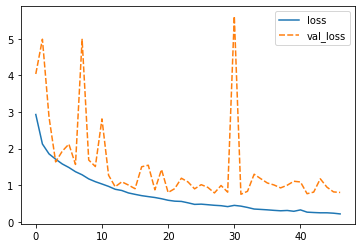

In [19]:
sns.lineplot(data = history_df.loc[:, ['loss', 'val_loss']])

<AxesSubplot:>

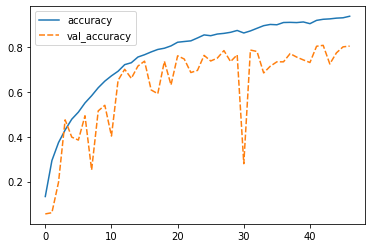

In [20]:
sns.lineplot(data = history_df.loc[:, ['accuracy', 'val_accuracy']])

# Evaluating on test data

In [21]:
model.evaluate(X_test, y_test)

31/31 [==============================] - 2s 39ms/step - loss: 0.8684 - accuracy: 0.7530


[0.868417501449585, 0.7530487775802612]

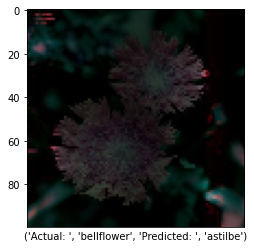

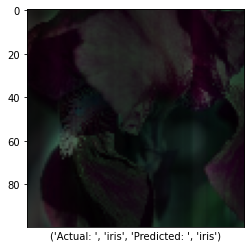

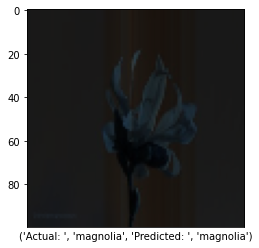

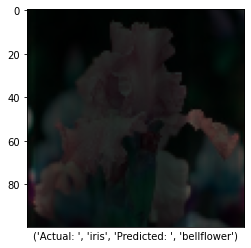

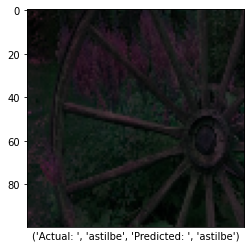

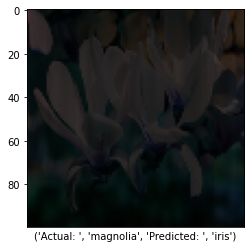

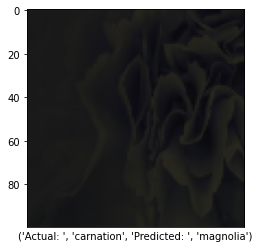

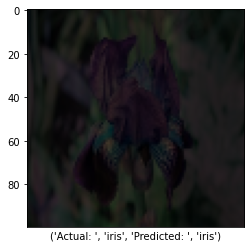

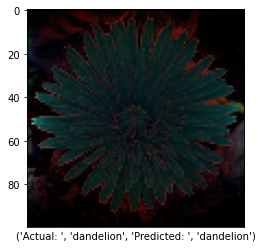

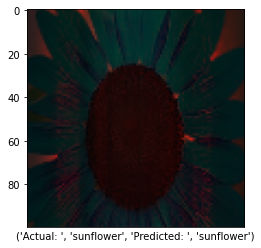

In [22]:
prediction = model.predict(X_test)
for i in range(10):
    plt.imshow(X_test[i])
    plt.xlabel(('Actual: ', Categories[np.argmax(y_test[i])],'Predicted: ',Categories[np.argmax(prediction[i])]))
    plt.xticks([])
    plt.show()